In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Define the path to your zip file
zip_file_path = '/content/drive/MyDrive/cdd.zip'

zip_object = zipfile.ZipFile(file=zip_file_path, mode='r')
extracted_folder_path = zip_object.extractall('./')
zip_object.close()

# List the extracted files
extracted_files = os.listdir(extracted_folder_path)
print("Files extracted successfully:", extracted_files)

Files extracted successfully: ['.config', 'drive', 'dataset', 'sample_data']


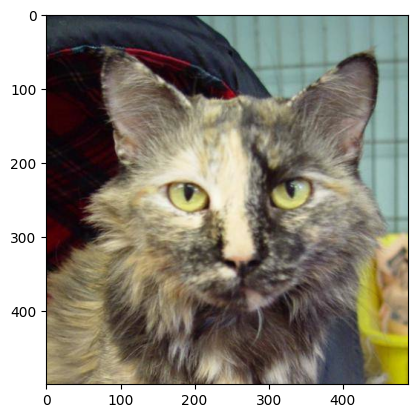

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('/content/dataset/training_set/cats/cat.10.jpg')

plt.imshow(img)


In [ ]:
import numpy as np
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16

# Load the pre-trained VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Freeze the pre-trained model layers
for layer in vgg16_model.layers:
    layer.trainable = False
# Step 1: Prepare the Dataset (assuming images are organized in folders)
train_data_dir = '/content/dataset/training_set'  # Path to the training dataset
test_data_dir  = '/content/dataset/test_set'   # Path to the testing dataset

img_width, img_height = 224, 224  # VGG16 input dimensions




58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Step 3: Prepare the Model for Fine-tuning
model = Sequential([
    vgg16_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])



In [ ]:
# Step 4: Train the Model
train_datagen = ImageDataGenerator(rescale=1. / 255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary')

test_datagen= ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width,img_height),
    batch_size=8,
    class_mode='binary'
)




Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(train_generator,
          epochs=5,
          steps_per_epoch= train_generator.samples//32,
          validation_data = test_generator,
          validation_steps=test_generator.samples//8
          )

Epoch 1/5
250/250 [==============================] - 135s 501ms/step - loss: 0.3128 - accuracy: 0.8636 - val_loss: 0.1955 - val_accuracy: 0.9170
Epoch 2/5
250/250 [==============================] - 123s 491ms/step - loss: 0.2068 - accuracy: 0.9129 - val_loss: 0.1731 - val_accuracy: 0.9280
Epoch 3/5
250/250 [==============================] - 135s 542ms/step - loss: 0.1717 - accuracy: 0.9310 - val_loss: 0.1693 - val_accuracy: 0.9325
Epoch 4/5
250/250 [==============================] - 120s 479ms/step - loss: 0.1543 - accuracy: 0.9354 - val_loss: 0.1702 - val_accuracy: 0.9325
Epoch 5/5
250/250 [==============================] - 123s 493ms/step - loss: 0.1434 - accuracy: 0.9421 - val_loss: 0.1652 - val_accuracy: 0.9355


In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_generator)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

250/250 [==============================] - 11s 45ms/step - loss: 0.1652 - accuracy: 0.9355
Test Loss: 0.1652085930109024
Test Accuracy: 0.9355000257492065


In [ ]:
# Step 3: Prepare the Model for Fine-tuning
rmodel = Sequential([
    vgg16_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


rmodel.compile(optimizer=Adam(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['accuracy'])


rmodel.fit(train_generator,
          epochs=5,
          steps_per_epoch= train_generator.samples//64,
          validation_data = test_generator,
          validation_steps=test_generator.samples//16
          )

Epoch 1/5
125/125 [==============================] - 68s 530ms/step - loss: 4.5753 - accuracy: 0.8008 - val_loss: 0.2510 - val_accuracy: 0.9030
Epoch 2/5
125/125 [==============================] - 61s 488ms/step - loss: 0.2850 - accuracy: 0.8763 - val_loss: 0.2839 - val_accuracy: 0.8860
Epoch 3/5
125/125 [==============================] - 60s 483ms/step - loss: 0.2653 - accuracy: 0.8915 - val_loss: 0.2558 - val_accuracy: 0.8990
Epoch 4/5
125/125 [==============================] - 79s 633ms/step - loss: 0.2244 - accuracy: 0.9035 - val_loss: 2.5970 - val_accuracy: 0.5490
Epoch 5/5
125/125 [==============================] - 64s 513ms/step - loss: 0.2161 - accuracy: 0.9180 - val_loss: 0.2389 - val_accuracy: 0.8970


In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = rmodel.evaluate(test_generator)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

250/250 [==============================] - 12s 46ms/step - loss: 0.2221 - accuracy: 0.9050
Test Loss: 0.2221064418554306
Test Accuracy: 0.9049999713897705


In [ ]:
# Step 3: Prepare the Model for Fine-tuning
rrmodel = Sequential([
    vgg16_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


rrmodel.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])


rrmodel.fit(train_generator,
          epochs=5,
          steps_per_epoch= train_generator.samples//32,
          validation_data = test_generator,
          validation_steps=test_generator.samples//8
          )

Epoch 1/5
250/250 [==============================] - 123s 485ms/step - loss: 0.3102 - accuracy: 0.8586 - val_loss: 0.2254 - val_accuracy: 0.9075
Epoch 2/5
250/250 [==============================] - 125s 502ms/step - loss: 0.1974 - accuracy: 0.9191 - val_loss: 0.2490 - val_accuracy: 0.8960
Epoch 3/5
250/250 [==============================] - 120s 481ms/step - loss: 0.1721 - accuracy: 0.9281 - val_loss: 0.1682 - val_accuracy: 0.9310
Epoch 4/5
250/250 [==============================] - 133s 534ms/step - loss: 0.1512 - accuracy: 0.9367 - val_loss: 0.3279 - val_accuracy: 0.8740
Epoch 5/5
250/250 [==============================] - 131s 523ms/step - loss: 0.1414 - accuracy: 0.9419 - val_loss: 0.1696 - val_accuracy: 0.9330


In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = rrmodel.evaluate(test_generator)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

In [ ]:
len(test_generator.classes)

2000

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52      1000
           1       0.51      0.50      0.51      1000

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



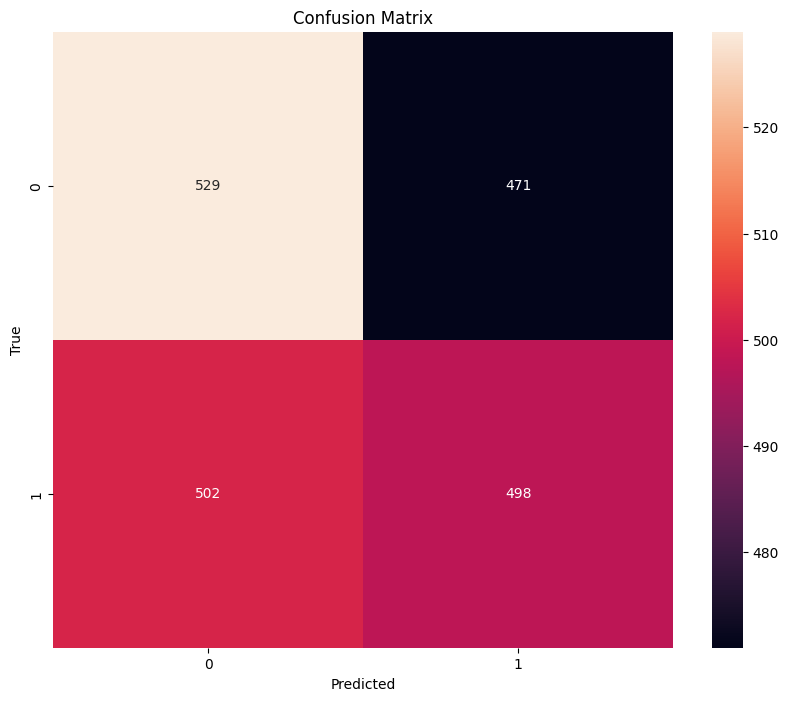

In [ ]:
from sklearn.metrics import classification_report as cr, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate classification report
report = cr(test_generator.classes, pred)
print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(test_generator.classes, pred)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')  # Use 'fmt='d'' to display values as integers
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
y_pred = model.predict(test_generator)


y_true = test_generator.classes

250/250 [==============================] - 12s 46ms/step


In [ ]:
y_pred

array([[2.2743343e-08],
       [9.9703109e-01],
       [9.9106520e-01],
       ...,
       [9.9998987e-01],
       [9.5502424e-01],
       [1.0844735e-01]], dtype=float32)

In [ ]:
test_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
pred=model.predict(test_generator)
pred

250/250 [==============================] - 11s 43ms/step


array([[1.0565262e-05],
       [1.6294961e-04],
       [1.1634429e-03],
       ...,
       [1.9582272e-02],
       [9.7868852e-02],
       [9.9439728e-01]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 27560769 (105.14 MB)
Trainable params: 12846081 (49.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.preprocessing import image

# Step 5: Prediction
def predict_vegetable(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Rescale pixel values
    predictions = model.predict(x)
    print(predictions)



    if(predictions>0.5):# Assuming you have a list of class labels
      print("dog")
    else:
      print("cat")

# Example usage:
image_path = '/content/cat.jfif'
predicted_vegetable = predict_vegetable(image_path)


1/1 [==============================] - 0s 31ms/step
[[0.00056228]]
cat


In [ ]:
pred = (pred>= 0.5).astype(int)
pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
test_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
model.save('catdog.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('catdog.h5')

In [ ]:
# Define the path to your zip file
zip_file_path = '/content/drive/MyDrive/dataset.zip'

zip_object = zipfile.ZipFile(file=zip_file_path, mode='r')
extracted_folder_path = zip_object.extractall('/content/dat')
zip_object.close()

# List the extracted files
extracted_files = os.listdir(extracted_folder_path)
print("Files extracted successfully:", extracted_files)

Files extracted successfully: ['.config', '.ipynb_checkpoints', 'catdog.h5', 'cat.jfif', 'dat', 'drive', 'dataset', 'sample_data']


In [ ]:
# Freeze the pre-trained model layers
for layer in loaded_model.layers:
    layer.trainable = False

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255)
train_data = image_generator.flow_from_directory('/content/dat/dataset/train', target_size=(224, 224), batch_size=32, class_mode='binary')
test_data = image_generator.flow_from_directory('/content/dat/dataset/test', target_size=(224, 224), batch_size=32, class_mode='binary')

Found 928 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = loaded_model.evaluate(test_data)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

3/3 [==============================] - 1s 92ms/step - loss: 63.8245 - accuracy: 0.5000
Test Loss: 63.82451629638672
Test Accuracy: 0.5


In [ ]:
# Step 3: Prepare the Model for Fine-tuning
cd_model = Sequential([
    loaded_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
cd_model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])


cd_model.fit(train_data,
          epochs=5,
          steps_per_epoch= train_data.samples//32,
          validation_data = test_data,
          validation_steps=test_data.samples//8
          )
# Print the model summary
cd_model.summary()

Epoch 1/5
29/29 [==============================] - ETA: 0s - loss: 0.5973 - accuracy: 0.7155

29/29 [==============================] - 6s 155ms/step - loss: 0.5973 - accuracy: 0.7155 - val_loss: 0.7950 - val_accuracy: 0.5000
Epoch 2/5
29/29 [==============================] - 4s 121ms/step - loss: 0.5972 - accuracy: 0.7155
Epoch 3/5
29/29 [==============================] - 4s 122ms/step - loss: 0.5973 - accuracy: 0.7155
Epoch 4/5
29/29 [==============================] - 4s 124ms/step - loss: 0.5972 - accuracy: 0.7155
Epoch 5/5
29/29 [==============================] - 4s 122ms/step - loss: 0.5972 - accuracy: 0.7155
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 1)                 27560769  
                                                                 
 flatten_6 (Flatten)         (None, 1)                 0         
                                                                 
 dense_13 (Dense)            (None, 512)               

In [ ]:


# Step 5: Evaluate the Model
test_loss, test_accuracy = cd_model.evaluate(test_data)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


3/3 [==============================] - 0s 77ms/step - loss: 0.8009 - accuracy: 0.5000
Test Loss: 0.8008987903594971
Test Accuracy: 0.5


In [ ]:
from tensorflow.keras.preprocessing import image

# Step 5: Prediction
def predict_vegetable(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Rescale pixel values
    predictions = cd_model.predict(x)
    print(predictions)



    if(predictions>0.5):# Assuming you have a list of class labels
      print("Mohanlal")
    else:
      print("Mamootty")

# Example usage:
image_path = '/content/mamo.jfif'
predicted_vegetable = predict_vegetable(image_path)



1/1 [==============================] - 0s 32ms/step
[[0.7157734]]
Mohanlal
